<a href="https://colab.research.google.com/github/mohan9345684510/Data-science-and-Machine-Learning-Project/blob/main/Diamonds_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diamonds price Prediction using RandomForestRegressor**

In [ ]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
# Data Collection andd processing

#load data
diamond_data = pd.read_csv('/content/diamonds.csv')
diamond_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
copy_diamond_data = diamond_data.copy()
copy_diamond_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# shape
diamond_data.shape

(53940, 10)

In [ ]:
# checking missing values
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# Data information
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Data Preprocessing**

In [ ]:
# Data statistical measures
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamond_data['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [ ]:
diamond_data['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [ ]:
diamond_data['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [ ]:
# label Encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

diamond_data['clarity'] = encoder.fit_transform(diamond_data['clarity'])

diamond_data['cut'] = encoder.fit_transform(diamond_data['cut'])

diamond_data['color'] = encoder.fit_transform(diamond_data['color'])

In [ ]:
diamond_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


**Data Analysis and EDA**

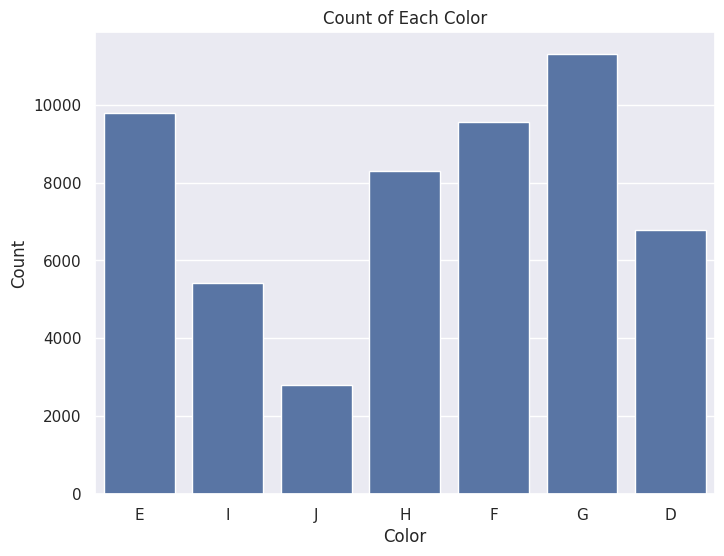

In [ ]:
# Count plot

sns.set()
plt.figure(figsize=(8, 6))
sns.countplot(data=copy_diamond_data, x='color')
plt.title('Count of Each Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()


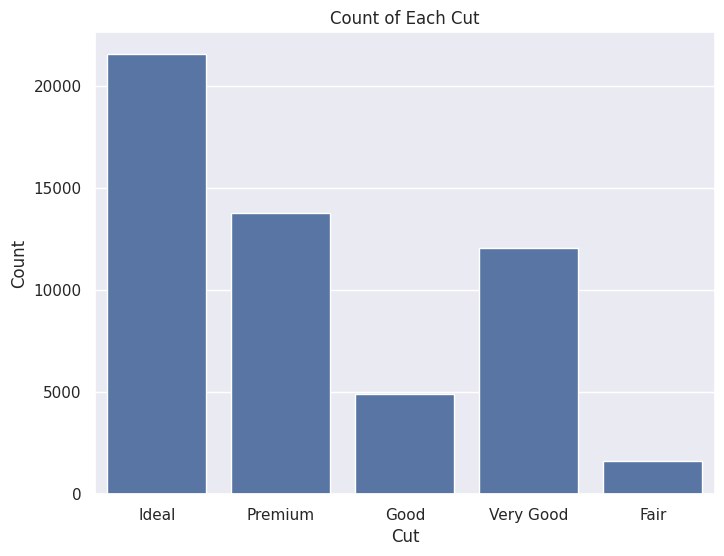

In [ ]:
# Count plot

sns.set()
plt.figure(figsize=(8, 6))
sns.countplot(data=copy_diamond_data, x='cut')
plt.title('Count of Each Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()


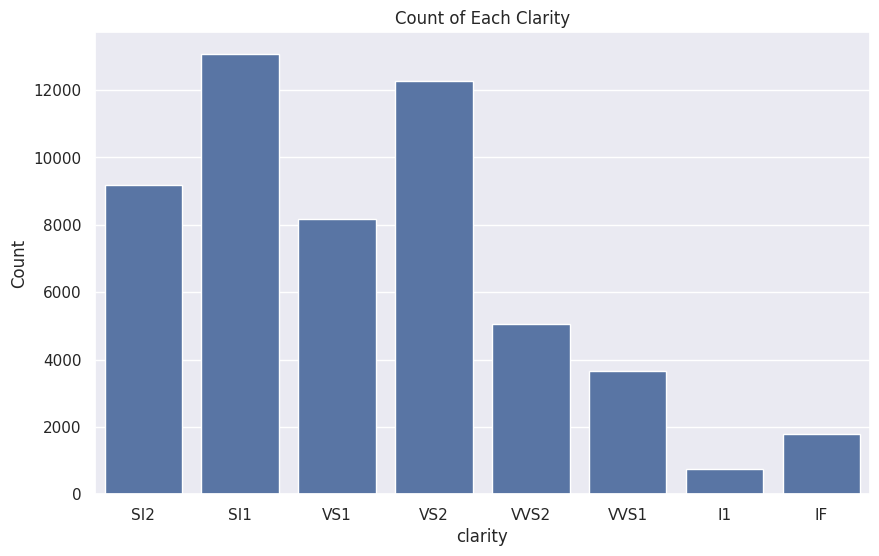

In [ ]:
# Count plot

sns.set()
plt.figure(figsize=(10, 6))
sns.countplot(data=copy_diamond_data, x='clarity')
plt.title('Count of Each Clarity')
plt.xlabel('clarity')
plt.ylabel('Count')
plt.show()


<Figure size 1000x1000 with 0 Axes>

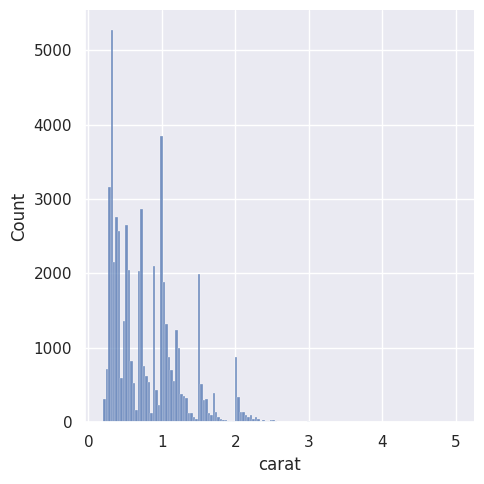

In [ ]:
plt.figure(figsize=(10, 10))
sns.displot(copy_diamond_data['carat'])

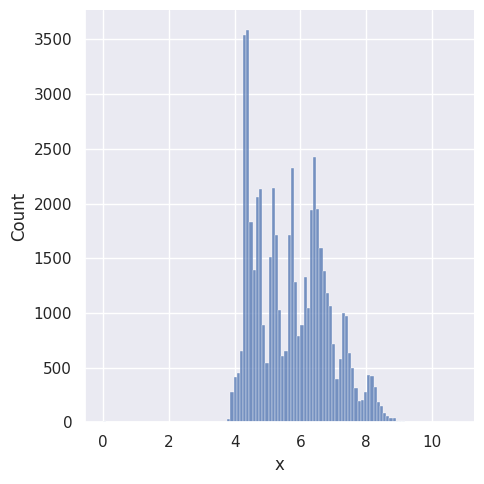

In [ ]:
sns.displot(copy_diamond_data['x'])

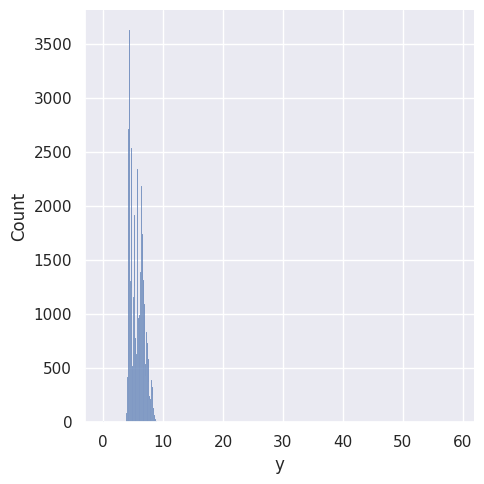

In [ ]:
sns.displot(copy_diamond_data['y'])

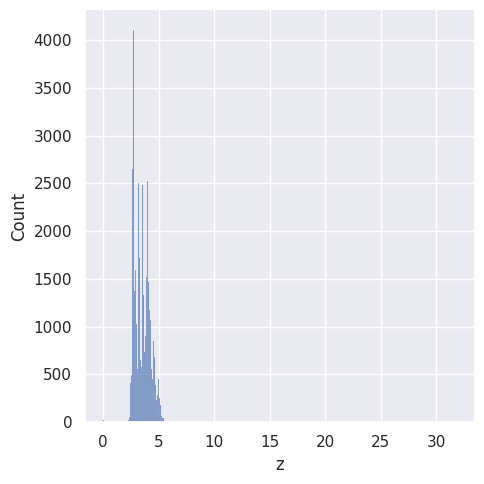

In [ ]:
sns.displot(copy_diamond_data['z'])

Correlation

In [ ]:
# Correlation

correlation = diamond_data.corr()

<Axes: >

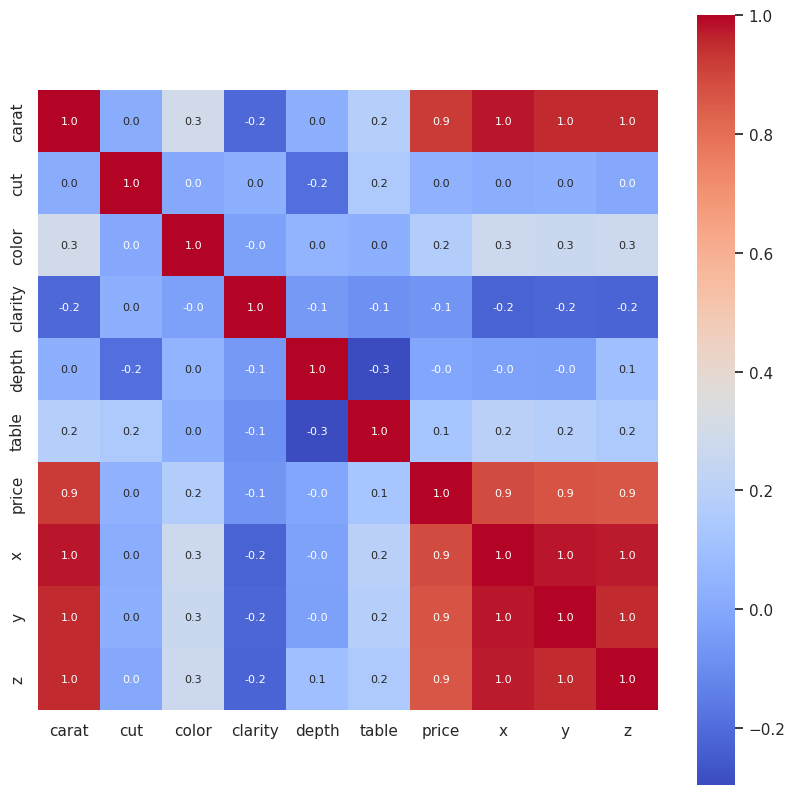

In [ ]:
plt.figure(figsize = (10,10))

sns.heatmap(correlation,cbar=True,square=True,fmt='0.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')

**Model Training**

In [ ]:
# Splitting the Features and Target

X = diamond_data.drop(['price'],axis = 1)
Y = diamond_data['price']

print(X)
print(Y)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0  5.83  5.87  3.64

[53940 rows x 9 columns]
0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, 

In [ ]:
# Splitting into Training data and Test data
X_train , X_test , Y_train ,Y_test =train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(X_test)
print(Y_test)

       carat  cut  color  clarity  depth  table     x     y     z
36681   0.40    4      2        4   62.0   56.0  4.71  4.73  2.92
21314   1.61    1      3        5   63.8   58.0  7.43  7.36  4.72
19527   1.02    2      3        1   62.5   57.0  6.37  6.44  4.00
41099   0.38    2      2        1   61.0   56.0  4.68  4.70  2.86
446     0.61    2      3        7   60.1   57.0  5.52  5.54  3.32
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
42128   0.48    3      2        5   61.3   60.0  5.01  4.97  3.06
45711   0.56    3      3        5   60.9   58.0  5.36  5.34  3.26
51985   0.25    4      2        7   59.3   59.0  4.15  4.18  2.47
39234   0.32    2      0        6   61.8   56.0  4.39  4.41  2.72
18327   1.51    3      6        5   63.0   57.0  7.38  7.29  4.62

[10788 rows x 9 columns]
36681     951
21314    9467
19527    8162
41099    1193
446      2816
         ... 
42128    1279
45711    1698
51985     548
39234    1067
18327    7455
Name: price, Length: 10788, 

In [ ]:
 # Model Training

regressor = RandomForestRegressor(n_estimators=100)

regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#r2_Score

#Train data

from sklearn.metrics import r2_score

train_data_predictions = regressor.predict(X_train)
r2 = r2_score(Y_train, train_data_predictions)
print('Training data R-squared (R2) score:', r2)

Training data R-squared (R2) score: 0.9973974916996124


In [ ]:
#Test data

test_data_predictions = regressor.predict(X_test)
r2 = r2_score(Y_test, test_data_predictions)
print('Test data R-squared (R2) score:', r2)

Test data R-squared (R2) score: 0.98029876262114


In [ ]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

train_data_predictions = regressor.predict(X_train)
mae = mean_absolute_error(train_data_predictions, Y_train)
print('Training data Mean Absolute Error:', mae)

Training data Mean Absolute Error: 100.67599978205503


In [ ]:
#Test Data

test_data_predictions = regressor.predict(X_test)
mae = mean_absolute_error(test_data_predictions, Y_test)
print('Test data Mean Absolute Error:', mae)

Test data Mean Absolute Error: 269.43176257570144


**Build a Predictive System**

In [ ]:
# Input Data

input_data = (0.48,3,2,5,61.3,60.0,5.01,4.97,3.06)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshpe the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Prediction = regressor.predict(input_data_reshaped)

print('The Diamond Price :' , Prediction[0])

The Diamond Price : 1326.17


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Autual Prices VS Predicted Prices in legend plot**

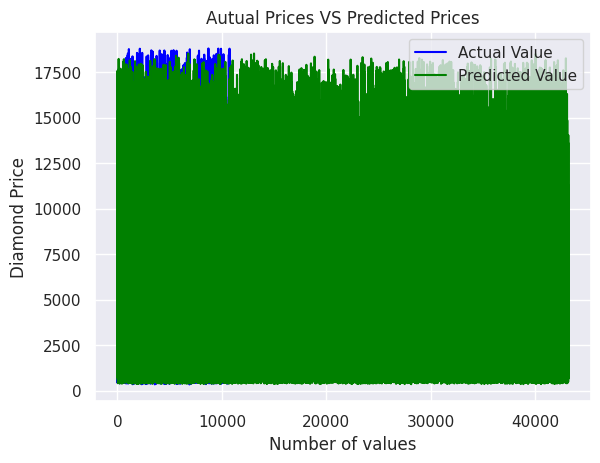

In [ ]:
Y_test = list(Y_test)

plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Autual Prices VS Predicted Prices')
plt.xlabel('Number of values')
plt.ylabel('Diamond Price')
plt.legend()
plt.show()